# full_dataset

In this notebook we replace part of the data by full dataset to make sure all outputs are predicted.

##### Load packages

In [9]:
# import packages
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble

import warnings 
warnings.filterwarnings("ignore")

##### load and merge data

URL: https://www.kaggle.com/c/zillow-prize-1/data<br>properties_2017.csv<br>properties_2017.csv<br>train_2016_v2.csv<br>train_2017.csv

In [10]:
# load properties
properties_2016 = pd.read_csv('../data/properties_2016.csv')
properties_2017 = pd.read_csv('../data/properties_2017.csv')
properties = pd.concat([properties_2016,properties_2017],ignore_index=True).drop_duplicates()

In [11]:
# load train
train_2016 = pd.read_csv('../data/train_2016_v2.csv', parse_dates=['transactiondate'])
train_2017 = pd.read_csv('../data/train_2017.csv', parse_dates=['transactiondate'])
train = pd.concat([train_2016,train_2017],ignore_index=True).drop_duplicates()
    
# merge properties and train
data = pd.merge(properties, train, on='parcelid', how='inner')

In [12]:
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


##### Peek of data

In [13]:
print(data.shape)
data.head()

(335776, 60)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,...,494390.0,859741.0,2015.0,365351.0,9608.74,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
1,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,...,501928.0,872850.0,2016.0,370922.0,9673.46,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
2,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,...,128881.0,429608.0,2015.0,300727.0,5494.04,NaN,NaN,6.111001e+13,0.073985,2017-07-26
3,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,...,130845.0,436157.0,2016.0,305312.0,5538.80,NaN,NaN,6.111001e+13,0.073985,2017-07-26
4,17068109,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,66.0,...,190508.0,282303.0,2015.0,91795.0,2954.74,NaN,NaN,6.111001e+13,0.071886,2017-07-28


##### Describe columns

Column 0: "parcelid"<br>Column 58: target "logerror"<br>Column 59: "transactiondate"<br>The meanings of column 1-57 are described as below:

In [14]:
# describ features
# URL: https://www.kaggle.com/c/zillow-prize-1/data
attributes = pd.read_excel('../data/zillow_data_dictionary.xlsx')
attributes.style

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (if any)
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
2,'basementsqft',Finished living area below or partially below ground level
3,'bathroomcnt',Number of bathrooms in home including fractional bathrooms
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the building from best (lowest) to worst (highest)
6,'buildingclasstypeid',"The building framing type (steel frame, wood frame, concrete/brick)"
7,'calculatedbathnbr',Number of bathrooms in home including fractional bathroom
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + sink + toilet)


##### Transactions in varible counties

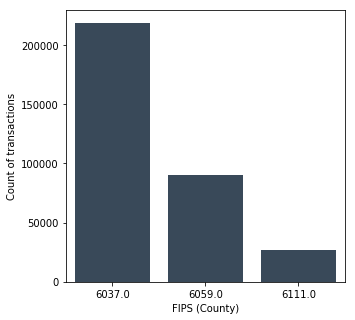

In [15]:
# check the counts of transactions in each county
# Reference: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
fips_dataset = data['fips'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(fips_dataset.index, fips_dataset.values,color='#34495e')
plt.xlabel('FIPS (County)')
plt.ylabel('Count of transactions')
plt.show()

##### Transactions in varible years

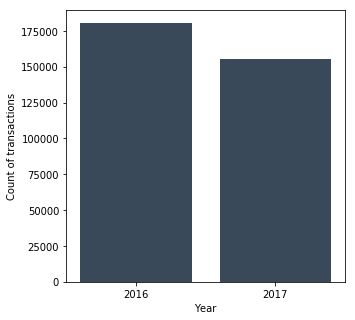

In [9]:
# check the counts of transactions in each year
# Reference: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
data['transaction_month'] = data['transactiondate'].dt.year
month_dataset = data['transaction_month'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(month_dataset.index, month_dataset.values,color='#34495e')
plt.xlabel('Year')
plt.ylabel('Count of transactions')
plt.show()

##### Choose a subset of data

We choose data of transtrations in Los Angeles (FIPS: 6037) to do the folowing work.

In [16]:
# drop column 'transaction_month' which was added above
data = data.drop(['transaction_month'], axis=1)

# choose data of '6037'
data_6037 = data
# drop column 'fips' and 'regionidcounty'
data_6037 = data_6037.drop(['fips', 'regionidcounty'], axis=1)
print(data_6037.shape)

ValueError: labels ['transaction_month'] not contained in axis

##### Drop non feature and target columns

In [11]:
# drop column 'parcelid' and column 'transactiondate'
data_6037 = data_6037.drop(['parcelid', 'transactiondate'], axis=1)
print(data_6037.shape)

(335776, 56)


##### Drop features with >= 10% missing values

In [12]:
for column in data_6037.columns:
    if data_6037[column].isnull().sum()/data_6037[column].shape >= 0.1:
        data_6037 = data_6037.drop([column], axis=1)      
print(data_6037.shape)

(335776, 22)


##### Show types of features

In [13]:
# show column's type
# Reference: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
type_data_6037 = data_6037.dtypes
type_data_6037.columns = ["Count", "Column Type"]
type_data_6037

bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
propertycountylandusecode        object
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
censustractandblock             float64
logerror                        float64
dtype: object

##### Drop two features with non float type

In [18]:
# drop column 'propertycountylandusecode' and column 'propertyzoningdesc'
data_6037= data_6037.drop(['propertycountylandusecode'], axis=1)
print(data_6037.shape)
data_6037.head()

(335776, 21)


,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,propertylandusetypeid,rawcensustractandblock,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
0,5.0,4.0,5.0,3760.0,3760.0,5.0,34449407.0,-119254052.0,261.0,6.111001e+07,...,97099.0,11.0,1982.0,494390.0,859741.0,2015.0,365351.0,9608.74,6.111001e+13,-0.013099
1,5.0,4.0,5.0,3760.0,3760.0,5.0,34449407.0,-119254052.0,261.0,6.111001e+07,...,97099.0,11.0,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,6.111001e+13,-0.013099
2,2.0,3.0,2.0,1444.0,1444.0,2.0,34454169.0,-119237898.0,261.0,6.111001e+07,...,97099.0,6.0,1951.0,128881.0,429608.0,2015.0,300727.0,5494.04,6.111001e+13,0.073985
3,2.0,3.0,2.0,1444.0,1444.0,2.0,34454169.0,-119237898.0,261.0,6.111001e+07,...,97099.0,6.0,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,6.111001e+13,0.073985
4,1.5,3.0,1.5,1698.0,1698.0,1.0,34365693.0,-119448392.0,261.0,6.111001e+07,...,97081.0,6.0,1979.0,190508.0,282303.0,2015.0,91795.0,2954.74,6.111001e+13,0.071886


##### Standardize 24 features

In [19]:
for column in data_6037:
    if data_6037.columns.get_loc(column) == 24:
        break
    data_6037[column] = StandardScaler().fit_transform(data_6037[column].values.reshape(-1, 1))
print(data_6037.shape)
data_6037.head()

(335776, 21)


,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,propertylandusetypeid,rawcensustractandblock,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
0,2.708610,0.833644,2.745295,2.104947,2.176816,2.852205,1.669622,-2.924252,-0.160154,3.010123,...,0.137663,3.372139,0.563494,1.398682,0.640205,-1.000200,0.168900,0.502770,0.584417,-0.162972
1,2.708610,0.833644,2.745295,2.104947,2.176816,2.852205,1.669622,-2.924252,-0.160154,3.010123,...,0.137663,3.372139,0.563494,1.432767,0.662025,0.999777,0.181478,0.511753,0.584417,-0.162972
2,-0.290520,-0.038454,-0.320309,-0.356191,-0.335006,-0.255030,1.687584,-2.879388,-0.160154,3.010123,...,0.137663,1.601147,-0.739807,-0.254040,-0.075751,-1.000200,0.023002,-0.068356,0.584417,0.362564
3,-0.290520,-0.038454,-0.320309,-0.356191,-0.335006,-0.255030,1.687584,-2.879388,-0.160154,3.010123,...,0.137663,1.601147,-0.739807,-0.245159,-0.064850,0.999777,0.033353,-0.062144,0.584417,0.362564
4,-0.790375,-0.038454,-0.831243,-0.086273,-0.059530,-1.290775,1.353858,-3.463983,-0.160154,3.010137,...,0.132829,1.601147,0.437368,0.024619,-0.320940,-1.000200,-0.448693,-0.420815,0.584420,0.349893


##### Fill all nan with 0

In [20]:
data_6037 = data_6037.fillna(0)

##### Rank features

Split data_6037 to X and y：

In [21]:
# split data_6027 to X and y
X = data_6037.iloc[:,0:24]
y = data_6037['logerror']
print(X.shape, y.shape)

(335776, 21) (335776,)


The importance ranking is as below:

In [22]:
et = ensemble.ExtraTreesRegressor()
et.fit(X.values, y.values)
feature_importances = pd.DataFrame(et.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.style

,importance
logerror,0.999204
yearbuilt,0.000201511
regionidzip,0.000123508
censustractandblock,9.93854e-05
propertylandusetypeid,6.24611e-05
bedroomcnt,5.34576e-05
bathroomcnt,5.34294e-05
structuretaxvaluedollarcnt,5.33784e-05
calculatedfinishedsquarefeet,2.43944e-05
landtaxvaluedollarcnt,2.27342e-05


##### Drop feature 'roomcnt' with very low 'importance'

In [23]:
# drop feature 'assessmentyear' and 'roomcnt'
data_6037= data_6037.drop(['roomcnt'], axis=1)
print(data_6037.shape)

(335776, 20)


##### Feature correlation analysis

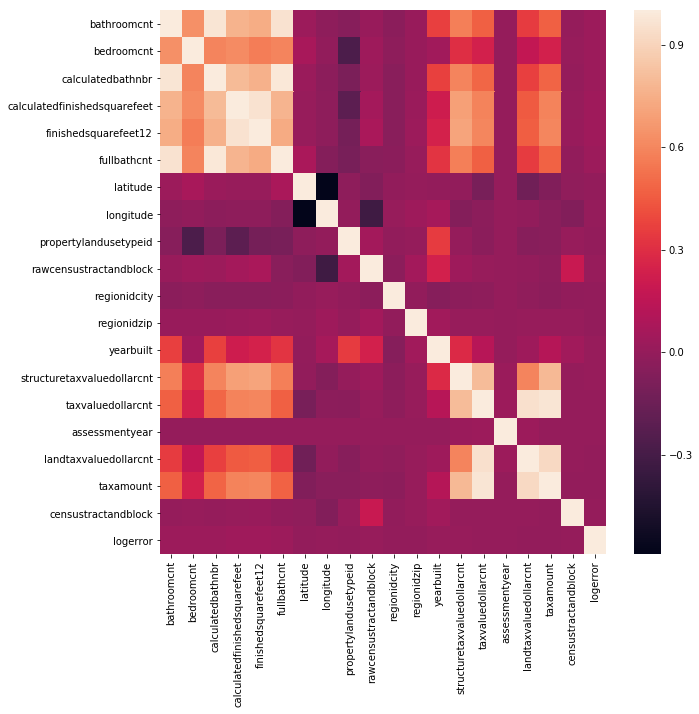

In [24]:
corr = data_6037.iloc[:,0:23].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr)

##### Drop one of the two features that have a correlation higher than 0.8

In [25]:
# Reference: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
corr_matrix = data_6037.corr()
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
data_6037 = data_6037[data_6037.columns[columns]]
print(data_6037.shape)

(335776, 14)


##### Drop properties with logerror outliers 

In [18]:
data_6037 = data
ulimit = np.percentile(data_6037.logerror.values, 99)
llimit = np.percentile(data_6037.logerror.values, 1)
data_6037 = data_6037[data_6037.logerror > llimit]
data_6037 = data_6037[data_6037.logerror < ulimit]
print(data_6037.shape)

(329058, 60)


There is nice normal distribution on the target 'logerror'

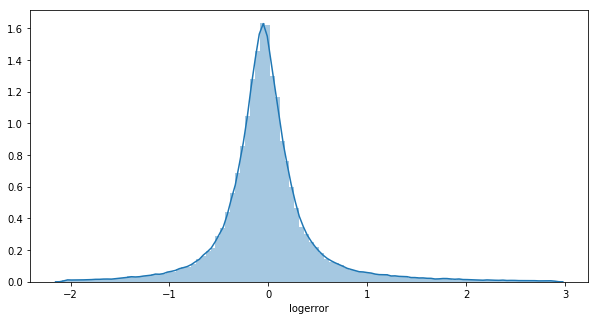

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(data_6037.logerror.values, bins=100)
plt.xlabel('logerror')
plt.show()

##### Describe data_6037

In [28]:
data_6037.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidzip,yearbuilt,structuretaxvaluedollarcnt,assessmentyear,censustractandblock,logerror
count,329058.000000,329058.000000,329058.000000,329058.000000,329058.000000,329058.000000,329058.000000,329058.000000,329058.000000,329058.000000,329058.000000,329058.000000,329058.000000,329058.000000
mean,0.001172,0.000658,-0.004034,-0.000369,0.001767,0.008977,0.003179,0.000863,-0.000222,0.010777,-0.003300,-0.000002,0.000653,-0.018641
std,0.989284,0.991150,0.980485,1.000542,1.001674,0.948174,1.001820,0.990102,0.968817,0.992125,0.965459,0.999757,1.007108,0.509968
min,-2.289940,-2.654750,-1.888557,-2.517654,-3.539035,-44.698511,-0.586713,-0.644380,-0.162329,-6.079139,-0.836602,-1.000200,-0.116578,-2.082183
25%,-0.290520,-0.910553,-0.629296,-0.733093,-0.590554,-0.160154,-0.572156,-0.453512,-0.104586,-0.655723,-0.457525,-1.000200,-0.113741,-0.230568
50%,-0.290520,-0.038454,-0.247799,0.054436,0.071730,-0.160154,-0.561458,-0.181340,-0.051409,0.058990,-0.225250,0.000000,-0.111653,-0.047713
75%,0.709190,0.833644,0.336668,0.630679,0.771978,0.808071,0.481205,0.249989,0.107584,0.773704,0.132867,0.999777,0.091551,0.147211
max,17.704260,14.787221,22.275436,3.062826,1.795450,2.550877,3.010522,7.732527,81.400260,1.992921,69.200197,0.999777,400.807460,2.908607


##### Output data_6037

In [19]:
data_6037.to_csv('../data/data_6037.csv')
print(data_6037.shape)
data_6037.head()

(329058, 60)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,...,494390.0,859741.0,2015.0,365351.0,9608.74,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
1,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,...,501928.0,872850.0,2016.0,370922.0,9673.46,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
2,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,...,128881.0,429608.0,2015.0,300727.0,5494.04,NaN,NaN,6.111001e+13,0.073985,2017-07-26
3,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,...,130845.0,436157.0,2016.0,305312.0,5538.80,NaN,NaN,6.111001e+13,0.073985,2017-07-26
4,17068109,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,66.0,...,190508.0,282303.0,2015.0,91795.0,2954.74,NaN,NaN,6.111001e+13,0.071886,2017-07-28
